# L1 and L2 Norms

Please make sure to run the following cell before anything else, it is important for proper notebook function

In [5]:
# IMPORTANT - Run this if you want the animated graphs to work in a jupyter notebook
%matplotlib widget

In [6]:
#imports
import numpy as np
import matplotlib.pyplot as plt
# Scipy package for doing regression
import scipy.optimize as spopt
import matplotlib.animation as ani

## L2 and L1 Norms

When predicting lines of the best fit we usually want to find some way to penalize how far off we are. Regression takes these values and finds the minimum of this penalty function. There are many ways that we can calculate this penalty, but the most common is probably the $L^{2}$ Norm. This is where we take the error between two points as the square of the difference between our prediction and the actual point.

$$
\begin{align}
    ||x-y||_{2}=\sum_{n}^{i=0}(x-y)^{2}
\end{align}
$$

This norm is particularly line due to how easy it is to calculate, and even more important, how easy it is to differentiate.

The problem with it, however, is that it's really susceptible to outliers due to the fact that the error is squared. Another error we can use is the $L^{0}$ norm, which takes the absolute value. This norm is very important for things like compressed sensing since it favours 0s, and the sparse matrix we are calculating in those cases needs a matrix with as many 0s as possible.

$$
\begin{align}
    ||x-y||_{1}=\sum_{n}^{i=0}|x-y|
\end{align}
$$

Unlike the $L^{2}$ norm the $L^{1}$ norm is not as easy to handle due to the difficulty of dealing with the absolute value. In the case where we want to take the derivative (which is important in regression). Below we'll be plotting some data to show the difference in characteristics between the two.

To test the properties of the two norms we are going to plot some data to manupulate to see the differences.

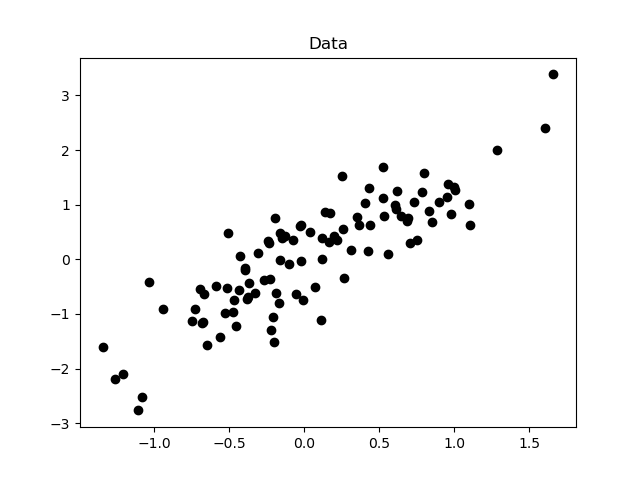

In [7]:
# Generate N random points
N = 100
y = np.random.randn(N,1)
x = y/2+np.random.randn(N,1)/3

#Plot the dataset
plt.cla()
plt.scatter(x,y, color='black')
plt.title('Data')
plt.show()

Now lets fit both the $L^{1}$ and the $L^{2}$ norms to the data.

In [8]:
# Lambda function for finding the min, follows equation (1) x0 is initial values for m and b (1 and 0 respectivly)
l1 = lambda x0, x, y: np.sum(np.abs(x0[0] * x + x0[1] - y))
l1fit = spopt.fmin(func=l1, x0=[1, 0], args=(x, y))

# Lambda function for finding the min, follows equation (2) x0 is initial values for m and b (1 and 0 respectivly)
l2 = lambda x0, x, y: np.sum(np.power(x0[0] * x + x0[1] - y, 2))
l2fit = spopt.fmin(func=l2, x0=[1, 0], args=(x, y))

Optimization terminated successfully.
         Current function value: 43.068226
         Iterations: 61
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: 29.311890
         Iterations: 34
         Function evaluations: 64


And plotting each gives us the following:

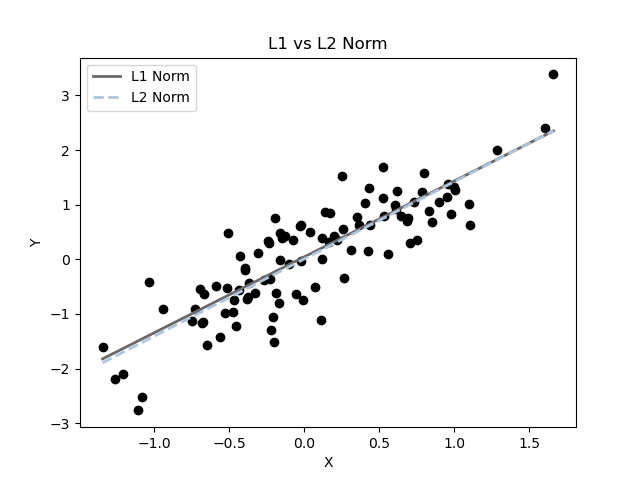

In [9]:
# Clear previous plot
plt.cla()

# Plot data
plt.scatter(x, y, color='black')

# Plot line of best fit (m_pred * x + b_pred)
plt.plot((min(x),max(x)),(l1fit[0]*min(x)+ l1fit[1],l1fit[0]*max(x)+ l1fit[1]), linewidth=2, color="dimgrey",label="L1 Norm");

# Plot line of best fit (m_pred * x + b_pred)
plt.plot((min(x),max(x)),(l2fit[0]*min(x)+ l2fit[1],l2fit[0]*max(x)+ l2fit[1]), linewidth=2, linestyle='--', color="lightsteelblue",label="L2 Norm");

plt.xlabel('X')
plt.ylabel('Y')
plt.title('L1 vs L2 Norm')
plt.legend()
plt.show()

As you can see at this stage both the $L^{1}$ and the $L^{2}$ norms give a very similar fit, in an ideal dataset both do just fine in predicting the data, so it's understandable why we would prefer the L2 norm with it's easier to calculate the equation. The quirks of the $L^{1}$ and $L^{2}$ norm do show when we add outliers. In the next plot, we will have two points which progressively get further and further away from the rest of the data. Watch how the two plots change:

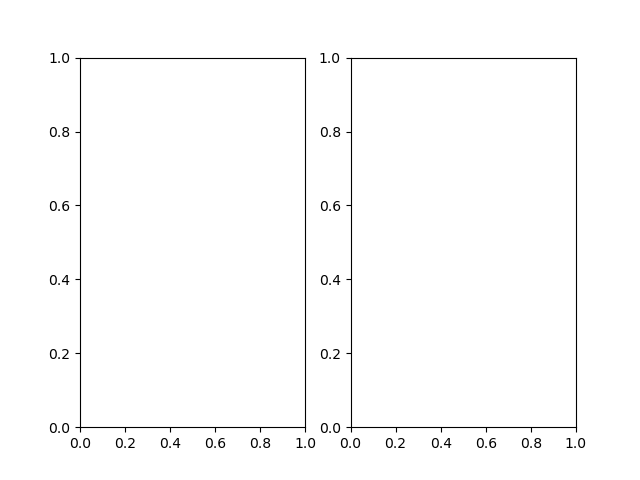

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)

y2 = y.copy()


# Animate funciton - how the animator should update the plot each frame
def anim_graph(i):
    
    # Mutate the data
    y2[3] = y[3] * i
    y2[58] = y[92] * i
    
    # Clear the plots
    ax1.cla()
    ax2.cla()
    
    # Refit both the l1 and l2 norm each time the data set changes
    l2 = lambda x0, x, y2: np.sum(np.power(x0[0] * x + x0[1] - y2, 2))
    l2fit = spopt.fmin(func=l2, x0=[1, 0], args=(x, y2))
    
    l1 = lambda x0, x, y2: np.sum(np.abs(x0[0] * x + x0[1] - y2))
    l1fit = spopt.fmin(func=l1, x0=[1, 0], args=(x, y2))
    
    # Title and axis labels
    ax1.set_title('Lines of Best Fit (W/O Outliers')
    ax2.set_title('Data W/ Outliers')
    ax2.scatter(x,y2, color='black')
    ax1.scatter(x, y, color='black')
    
    ax1.legend()
    
    # Plot the new fit
    ax1.plot((min(x),max(x)),(l1fit[0]*min(x)+ l1fit[1],l1fit[0]*max(x)+ l1fit[1]), color="dimgrey", label="L1 Norm")
    ax1.plot((min(x),max(x)),(l2fit[0]*min(x)+ l2fit[1],l2fit[0]*max(x)+ l2fit[1]), linestyle='--', color="lightsteelblue", label="L2 Norm")

animator = ani.FuncAnimation(fig, anim_graph, frames=1000, interval=10)
plt.show()

In [11]:
# To stop the animator from plotting the data
animator.event_source.stop()

As you can see as the data gets points to become larger and larger outliers the $L^{1}$ norm sticks closer to the original data, while the $L^{2}$ norm moves to compensate for the outlier the bigger it gets. In cases where there aren't outliers or outliers can be pruned the $L^{2}$ norm can be used just fine, but in the case where we have to consider these data points it is important to consider what they do to the $L^{2}$ norm.